In [95]:
import os

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
%config InlineBackend.figure_format='retina'

sns.set_palette('muted')
sns.set_style('whitegrid')

In [4]:
os.listdir()

['images',
 'USA_Housing.csv',
 'Linear Regression Walk Through.ipynb',
 'Linear_Regression_assignment.pdf',
 '.ipynb_checkpoints',
 'ex1data1.txt',
 'ex1data2.txt',
 'Ecommerce Customers',
 'Linear_regression_barebones.ipynb']

In [8]:
df = pd.read_csv('Ecommerce Customers')

In [9]:
print(df.shape)
df.head()

(500, 8)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Investigation Notes
* Already it is clear users spend far more time on the website than the app. This could be interpreted in two ways:
    * More time spent improving site because users spend more time there
    * More time improving app to make it more enjoyable so users spend more time there.
* But, users tend to spend more money the more time they spend in the app. Again, this has multiple interpretations:
    * The app has a mechanism that encourages spending. Update the website to match
    * The app already gets users to spend, we just need them to spend more time on the app!

<AxesSubplot:>

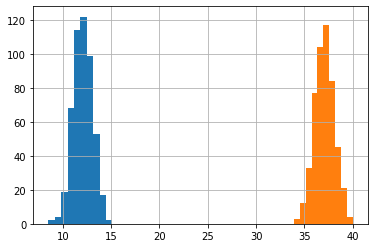

In [14]:
df['Time on App'].hist(bins=10)
df['Time on Website'].hist(bins=10)

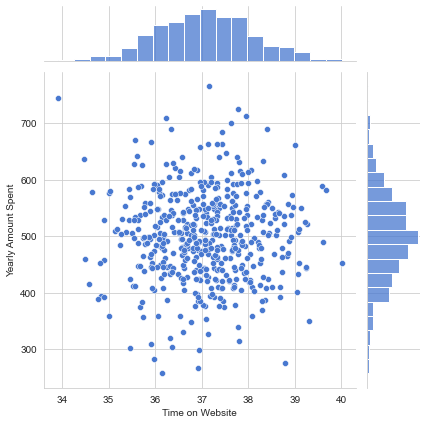

In [20]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

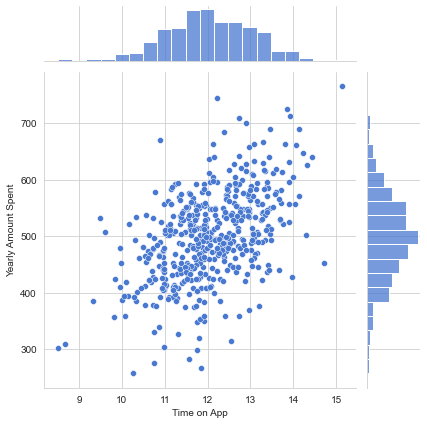

In [21]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

# Linear Regression

In [26]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [23]:
X = df[['Avg. Session Length', 'Time on App' , 'Time on Website', 'Length of Membership']].values
Y = df[['Yearly Amount Spent']].values

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Training

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)

print(lr_model.coef_)

[[25.70676165 38.57260842  0.62520092 61.71767604]]


### Test

In [72]:
# Predict training examples (would expect a higher accuracy)
X_train_predict = lr_model.predict(X_train)

train_predictions = pd.DataFrame({
    'X_train_predict': X_train_predict.flatten(), 'y_train': y_train.flatten()
})
train_predictions = train_predictions.sort_values('X_train_predict')

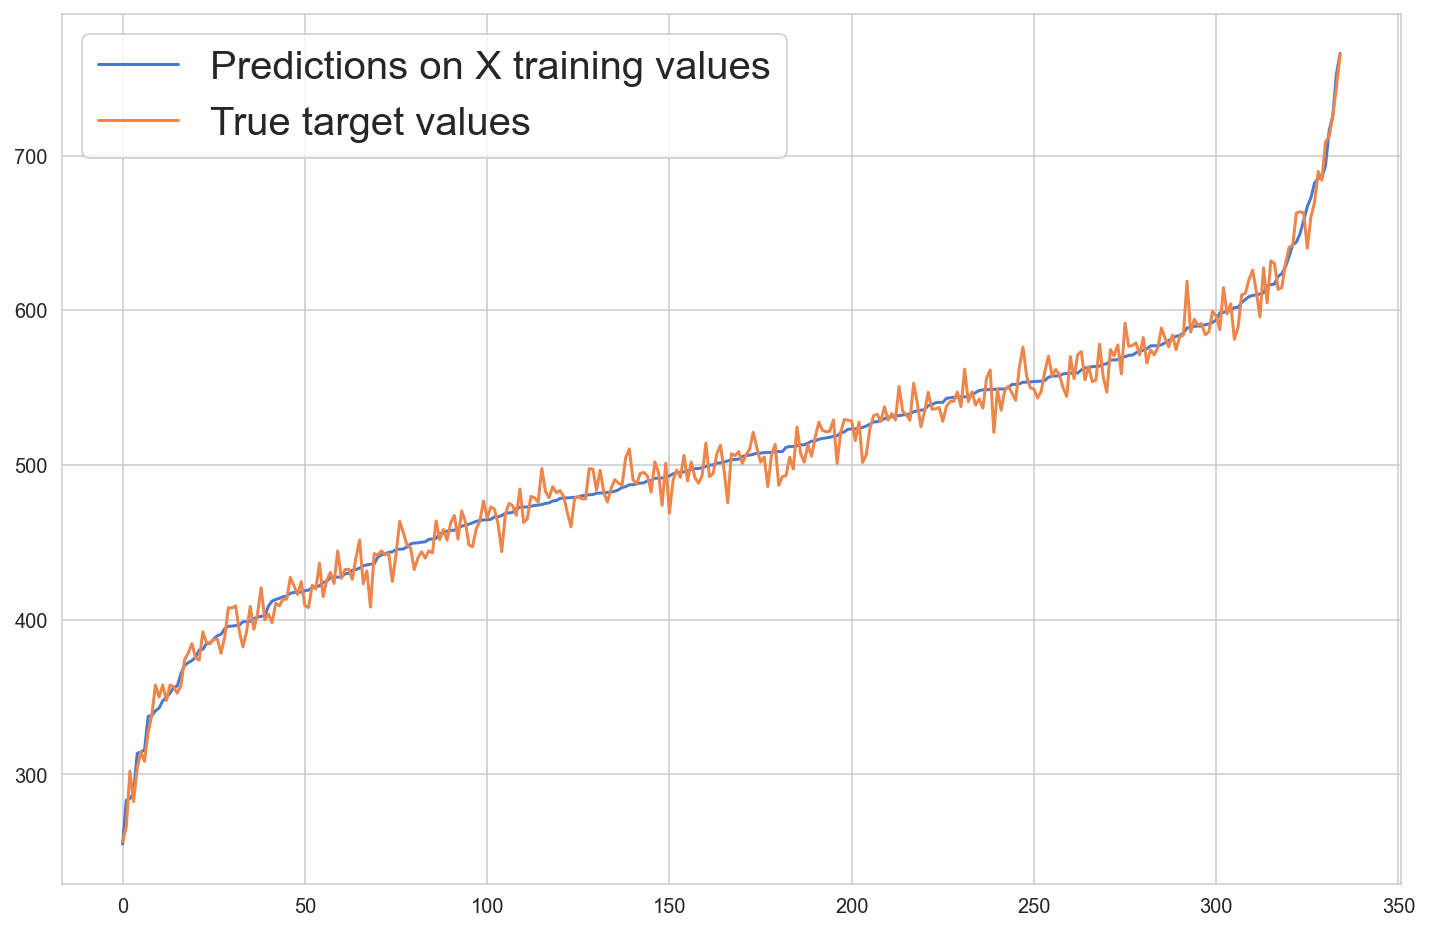

In [82]:
plt.figure(figsize=(12, 8))
plt.plot(train_predictions['X_train_predict'].values)
plt.plot(train_predictions['y_train'].values)
plt.legend(['Predictions on X training values', 'True target values'], fontsize=20)

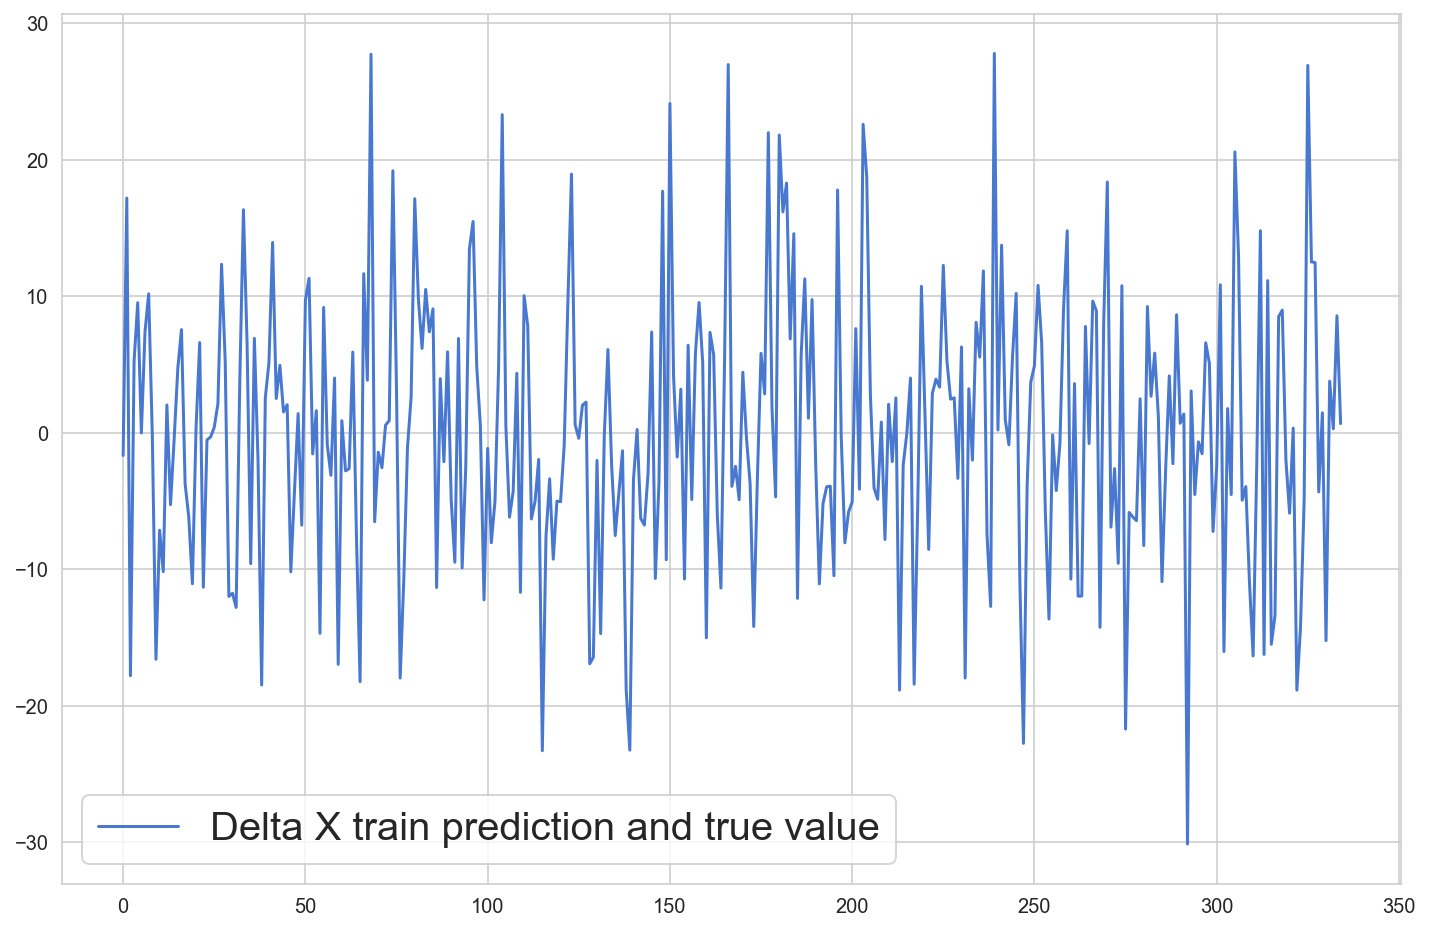

In [85]:
train_error = train_predictions['X_train_predict'].values - train_predictions['y_train'].values
plt.figure(figsize=(12, 8))
plt.plot(train_error)
plt.legend(['Delta X train prediction and true value'], fontsize=20)

In [90]:
pd.Series(train_error).describe()

count    3.350000e+02
mean    -2.826900e-13
std      9.860156e+00
min     -3.012981e+01
25%     -5.865910e+00
50%     -1.526407e-01
75%      5.919734e+00
max      2.779031e+01
dtype: float64

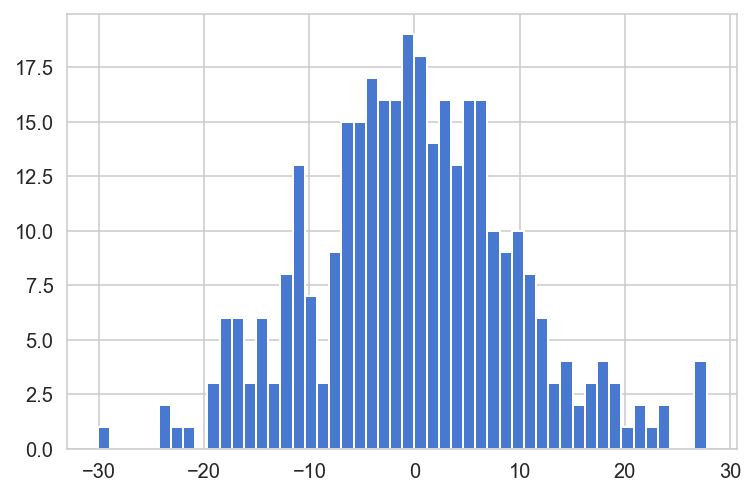

In [91]:
plt.hist(train_error, bins=50)
plt.show()

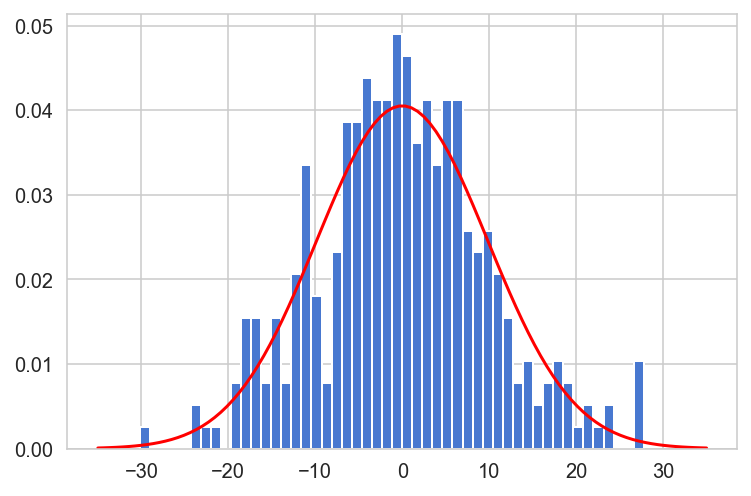

In [101]:
# Errors seem to be roughly normally distributed 
# Why is this important: If error is not normally distriburted, our predictors technically mean different
# things at different levels of the dependent variable. Not so good for interpretation. 
mean, var  = scipy.stats.distributions.norm.fit(train_error)

x_axis = np.linspace(-35, 35, 100)
fit_dist = scipy.stats.distributions.norm.pdf(x_axis, mean, var)

plt.hist(train_error, density=True, bins=50)
plt.plot(x_axis, fit_dist, 'r-')

In [105]:
mean_squared_error = (train_error**2).mean()
print('Mean Squared error for predictions on training data: ', mean_squared_error)

Mean Squared error for predictions on training data:  96.93245468960643


### Test Data

In [106]:
# Predict testing examples (would expect a lower accuracy)
X_test_predict = lr_model.predict(X_test)

test_predictions = pd.DataFrame({
    'X_test_predict': X_test_predict.flatten(), 'y_test': y_test.flatten()
})
test_predictions = test_predictions.sort_values('X_test_predict')

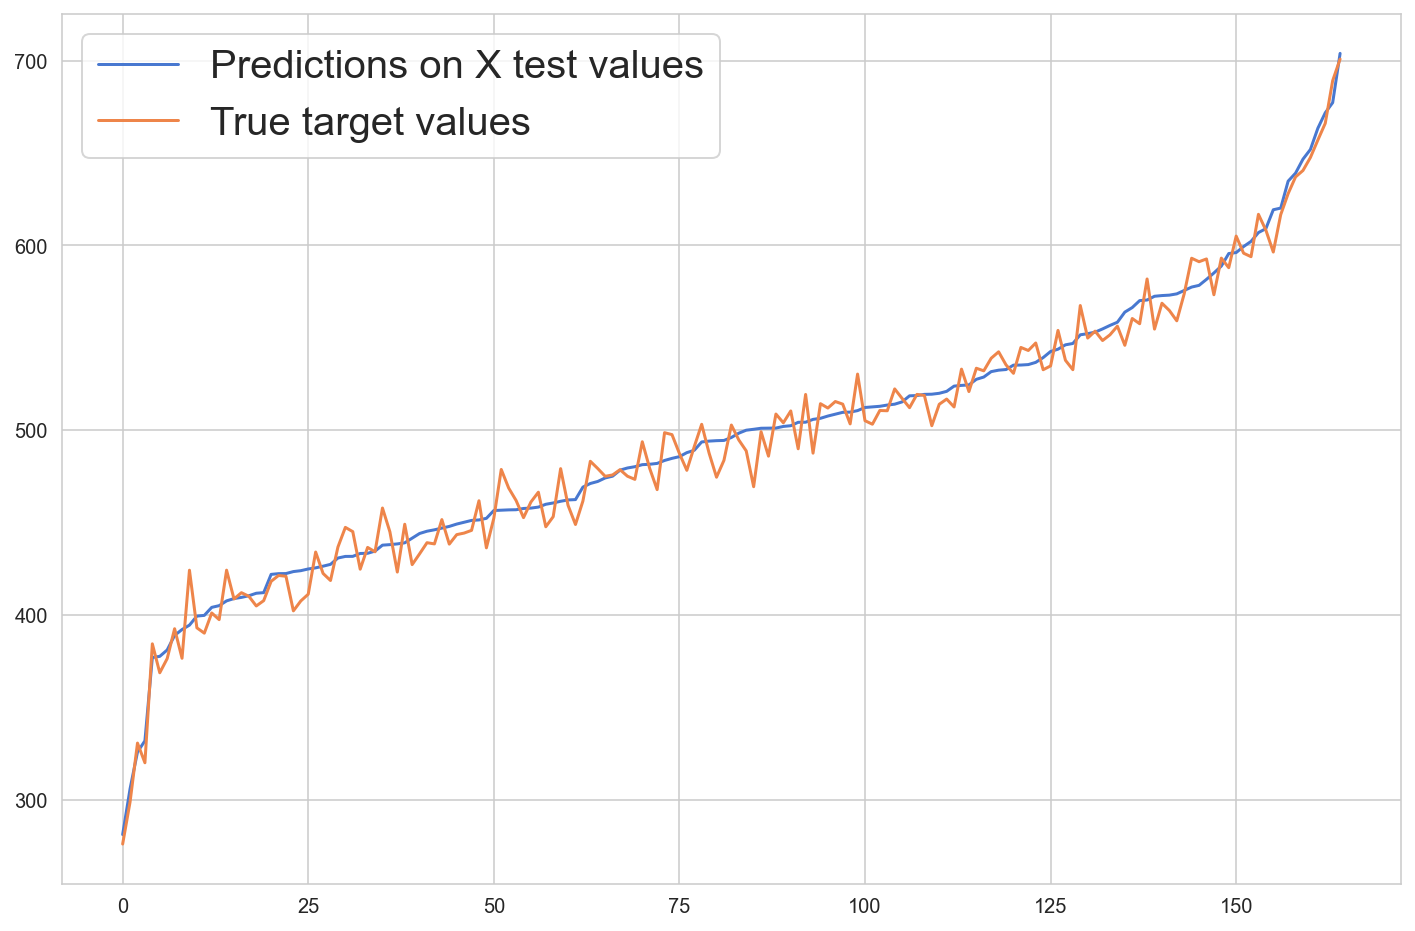

In [107]:
plt.figure(figsize=(12, 8))
plt.plot(test_predictions['X_test_predict'].values)
plt.plot(test_predictions['y_test'].values)
plt.legend(['Predictions on X test values', 'True target values'], fontsize=20)

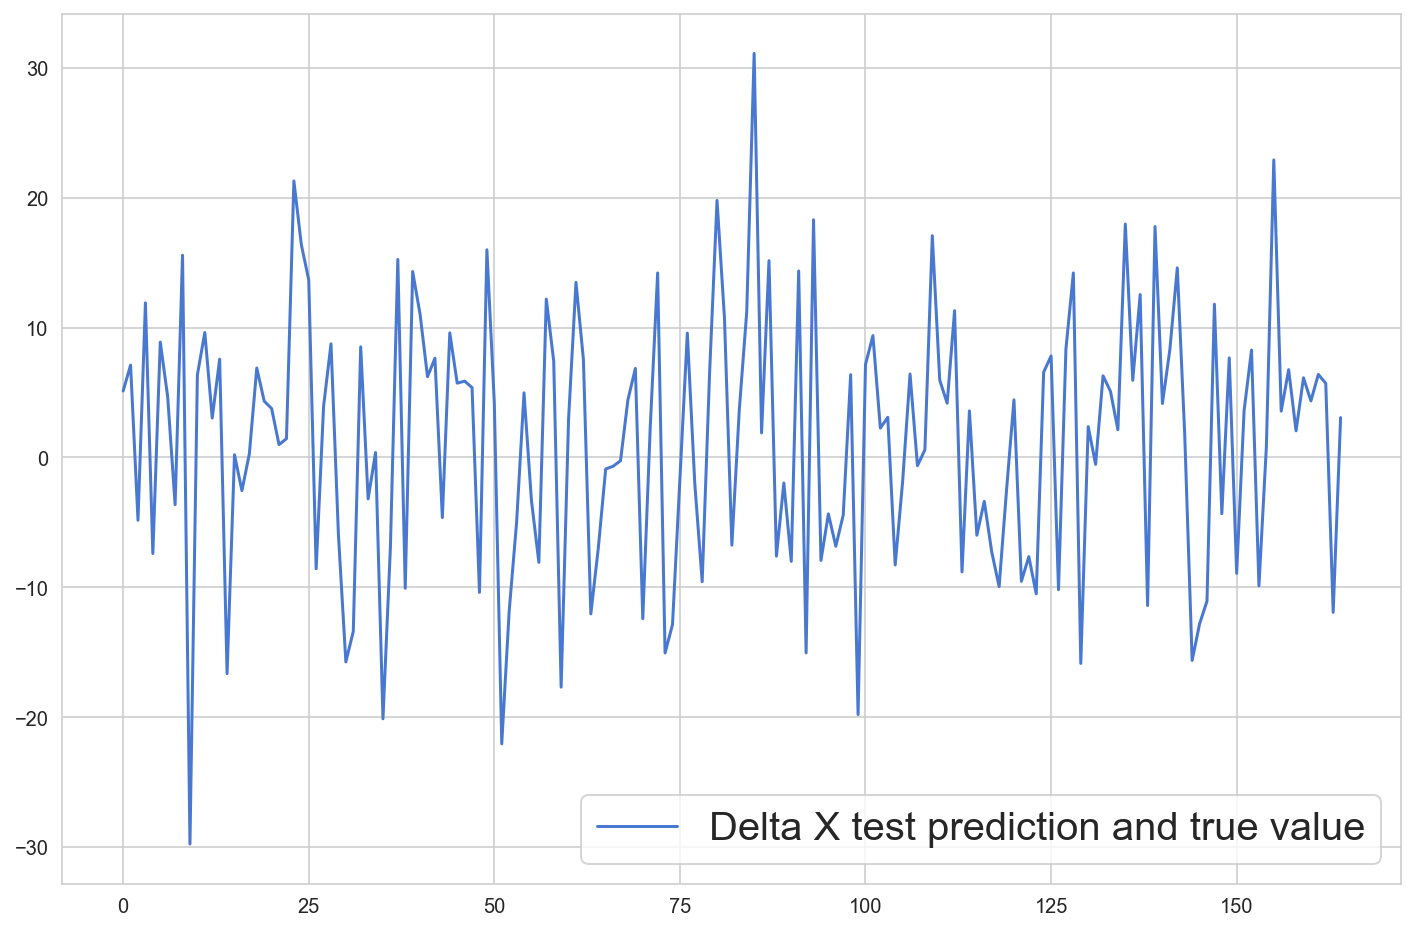

In [108]:
test_error = test_predictions['X_test_predict'].values - test_predictions['y_test'].values
plt.figure(figsize=(12, 8))
plt.plot(test_error)
plt.legend(['Delta X test prediction and true value'], fontsize=20)

In [109]:
pd.Series(test_error).describe()

count    165.000000
mean       1.356448
std       10.058704
min      -29.741753
25%       -6.831476
50%        3.069456
75%        7.567356
max       31.091724
dtype: float64

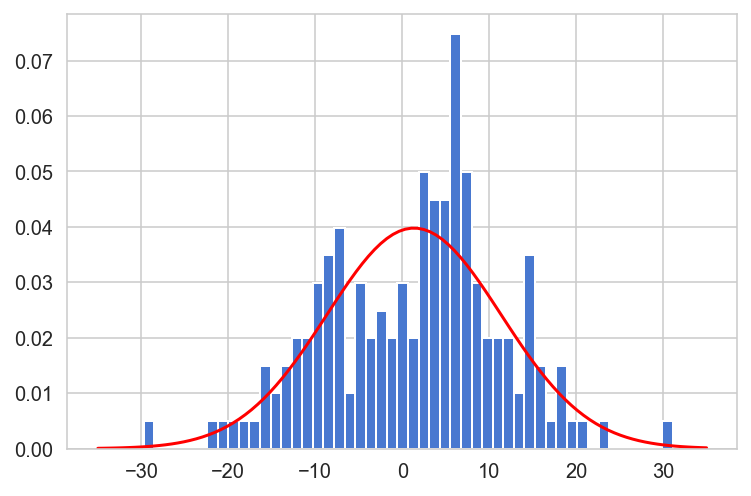

In [110]:
# Errors seem to be roughly normally distributed 
# Why is this important: If error is not normally distriburted, our predictors technically mean different
# things at different levels of the dependent variable. Not so good for interpretation. 
mean, var  = scipy.stats.distributions.norm.fit(test_error)

x_axis = np.linspace(-35, 35, 100)
fit_dist = scipy.stats.distributions.norm.pdf(x_axis, mean, var)

plt.hist(test_error, density=True, bins=50)
plt.plot(x_axis, fit_dist, 'r-')

In [111]:
mean_squared_error = (test_error**2).mean()
print('Mean Squared error for predictions on testing data: ', mean_squared_error)

Mean Squared error for predictions on testing data:  102.40428659931857


### A Note on Model Regularization
* For both L1 and L2 regularization, the optimization function is trying to minimize the loss.
* For L1 regularization, our coefficients never get super large, just all positive. Those that are large and aren't super important will be shrunk towards 0. If they are important, they don't hurt the overall loss that badly so they will be kept. For instance, if we had a coefficient of 45, its absolute value is 45, and that will add 45 to our loss, which isn't that bad, assuming that if we try and decrease it our predictions suffer
* L2, because it squares the coefficients, has incentive to shrink them all! Consider the example of 45 again. 45^2 is 2025, which is what will be added to our loss. Even if this is a useful coefficient on a super important predictor, shrinking it will help reduce our loss significantly (especially considering that squaring is convex, so the larger the coefficient the greater the effect)

In [113]:
lr_model.coef_

array([[25.70676165, 38.57260842,  0.62520092, 61.71767604]])

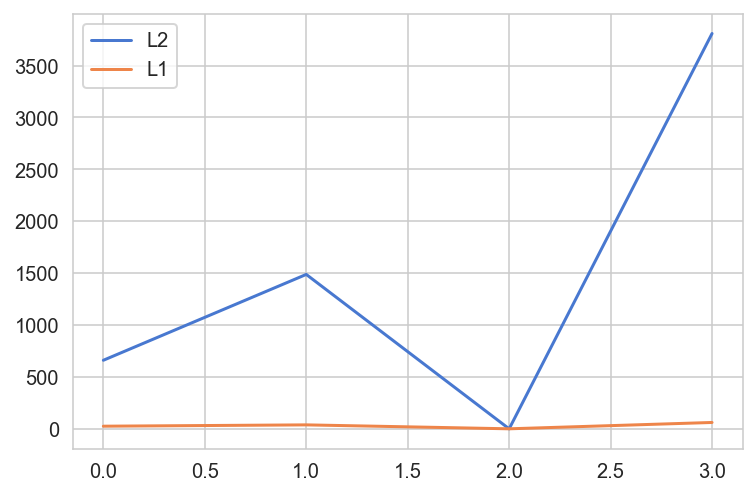

In [122]:
plt.plot((lr_model.coef_**2).flatten())
plt.plot(np.abs(lr_model.coef_).flatten())
plt.legend(['L2', 'L1'])

# From Scratch

In [420]:
df['ones'] = 1

In [421]:
X = df[['ones', 'Avg. Session Length', 'Time on App' , 'Time on Website', 'Length of Membership']].values
Y = df[['Yearly Amount Spent']].values.flatten()

In [422]:
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
print(w)

[-1.05159426e+03  2.57342711e+01  3.87091538e+01  4.36738836e-01
  6.15773238e+01]


In [432]:
# Linear regression states that: Y = X * W + error

In [520]:
N = X.shape[0]
D = X.shape[1]

W = (np.random.randn(D) / np.sqrt(D))
print(W)

[ 0.70272661  0.34994089 -0.21856229 -0.73828663  0.43790887]


In [521]:
costs = []
lrs = []
last_mse = 0
learning_rate = 0.0001
lr_adapt = 1 + learning_rate
steps = 100000

for t in range(steps):

    predictions = W.dot(X.T) # Linear transformation
    error = Y - predictions
    gradient = np.dot(-X.T, error)
    gradient = gradient / len(X)
    gradient *= learning_rate    
    
    W = W - gradient
        
    mse = error.dot(error) / N
    
    delta_mse = mse - last_mse
    if delta_mse < 5 and delta_mse < 0 and t % 5 == 0:    
        learning_rate *= lr_adapt
    last_mse = mse
    
    lrs.append(learning_rate)
    costs.append(mse)

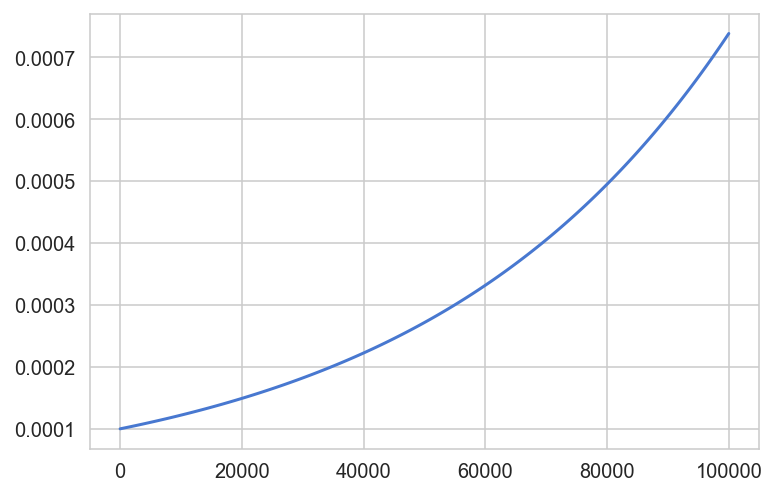

In [522]:
plt.plot(lrs)

In [523]:
learning_rate

0.0007387578521662697

In [524]:
W

array([-11.7034413 ,  12.02540163,  34.79048759, -14.00160457,
        60.42926352])

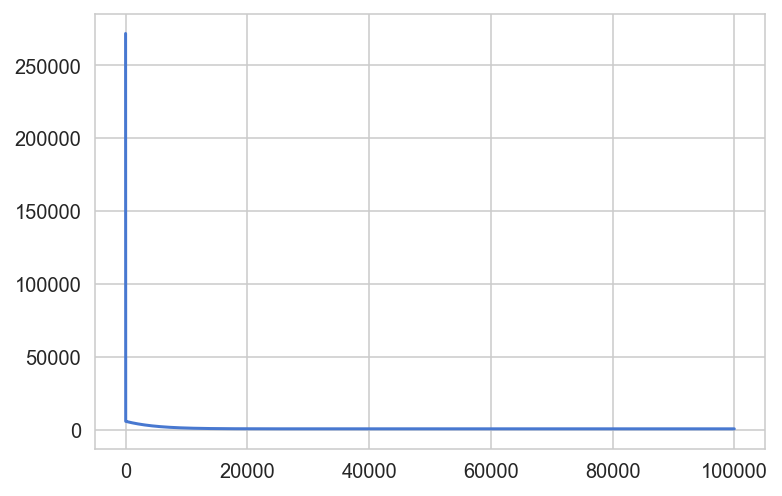

In [525]:
plt.plot(costs)

In [526]:
Y_pred_gradient_descent = X.dot(W)

In [527]:
Y_pred_closed_form = X.dot(w)

In [538]:
preds = pd.DataFrame({
    'Y_pred_gradient_descent': Y_pred_gradient_descent.flatten(), 'Y_pred_closed_form': Y_pred_closed_form.flatten()
})
preds = preds.sort_values('Y_pred_gradient_descent')

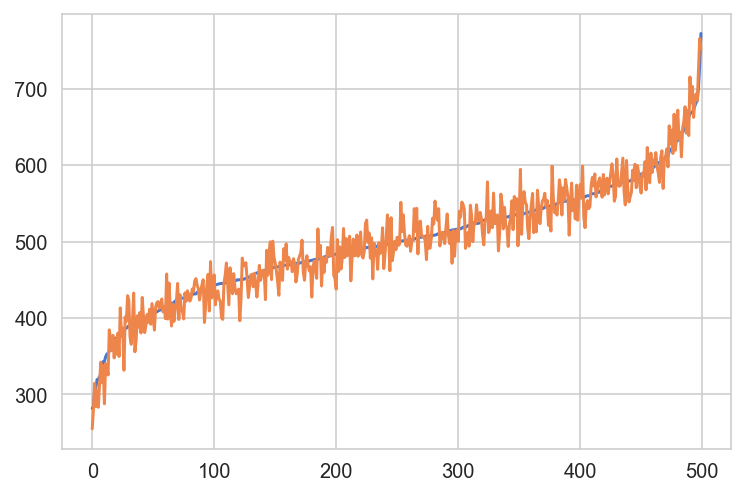

In [529]:
plt.plot(preds['Y_pred_gradient_descent'].values)
plt.plot(preds['Y_pred_closed_form'].values)

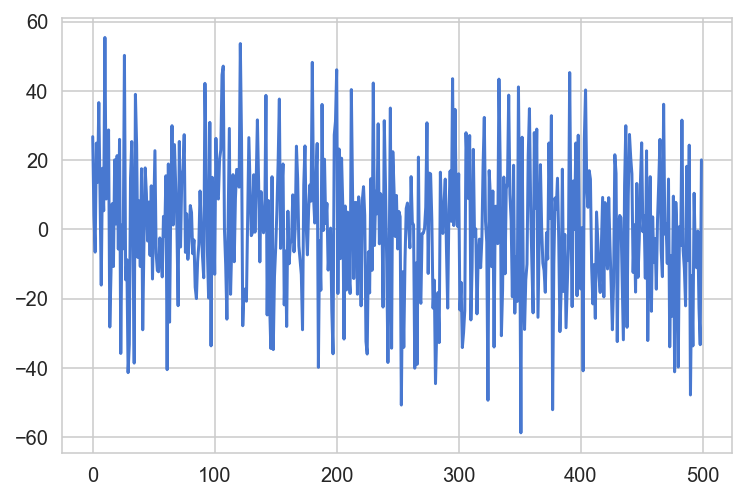

In [530]:
plt.plot(preds['Y_pred_gradient_descent'].values - preds['Y_pred_closed_form'].values)

In [531]:
W

array([-11.7034413 ,  12.02540163,  34.79048759, -14.00160457,
        60.42926352])

In [532]:
w

array([-1.05159426e+03,  2.57342711e+01,  3.87091538e+01,  4.36738836e-01,
        6.15773238e+01])

In [533]:
W - w

array([1039.890814  ,  -13.70886945,   -3.91866622,  -14.43834341,
         -1.14806024])

In [534]:
np.linalg.norm(W - w)

1040.0894086043613

In [535]:
# Error between closed form model and preds, and gradient descent model and preds

In [547]:
print('MSE of gradient descent based prediction: ', ((preds['Y_pred_gradient_descent'] - Y)**2).mean())
print('TSE of gradient descent based prediction: ', ((preds['Y_pred_gradient_descent'] - Y)**2).sum())


MSE of gradient descent based prediction:  12538.513732300851
TSE of gradient descent based prediction:  6269256.866150426


In [548]:
print('MSE of gradient descent based prediction: ', ((preds['Y_pred_gradient_descent'] - Y)**2).mean())
print('TSE of gradient descent based prediction: ', ((preds['Y_pred_closed_form'] - Y)**2).sum())


MSE of gradient descent based prediction:  12538.513732300851
TSE of gradient descent based prediction:  6695963.527226906


In [ ]:
# My adaptive learning rate is performing better than built in ;)